In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mp

# Load dataset
file = './data.xlsx'
data = pd.read_excel(file)

# Initialize graph
G = nx.Graph()


def generate(datafile, graph):
    for index, row in datafile.iterrows():
        # Node will be named after 'city, state'
        node_name = f"{row['city']}, {row['state']}"
        # Parse lists
        connected_cities = row['connected cities'].split(',')
        connected_states = row['connected cities states'].split(',')
        distances = row['distance to city'].split(',')
        # distances = [int(dist) for dist in row['distance to city'].split(',')]

        # Add the current city if not already in graph or update with lat, long, & interstates
        graph.add_node(node_name, lat=row['lat'], long=row['long'], interstates=row['interstates'])

        # Add edges
        for i, (connected_city, connected_state) in enumerate(zip(connected_cities, connected_states)):
            connected_city_state = f"{connected_city.strip()}, {connected_state.strip()}"
            if connected_city_state not in graph:
                graph.add_node(connected_city_state)
            # Distance is cost
            graph.add_edge(node_name, connected_city_state, distance=int(distances[i]))


generate(data, G)

# nx.draw(G)
# mp.pyplot.show()

nodes = G.number_of_nodes()
edges = G.number_of_edges()
print("nodes: ", nodes, " | edges: ", edges)
# print(G.edges.data())
# for node in G.nodes.data():
#     print(node)
    # print(node[2]["distance"])
    # x = node[2]
    # print(x['distance'])
    # print(node[2])
# for edge in nx.edges(G):
#     print(edge)
# for line in nx.generate_adjlist(G):
#     print(line)

nodes:  315  | edges:  392


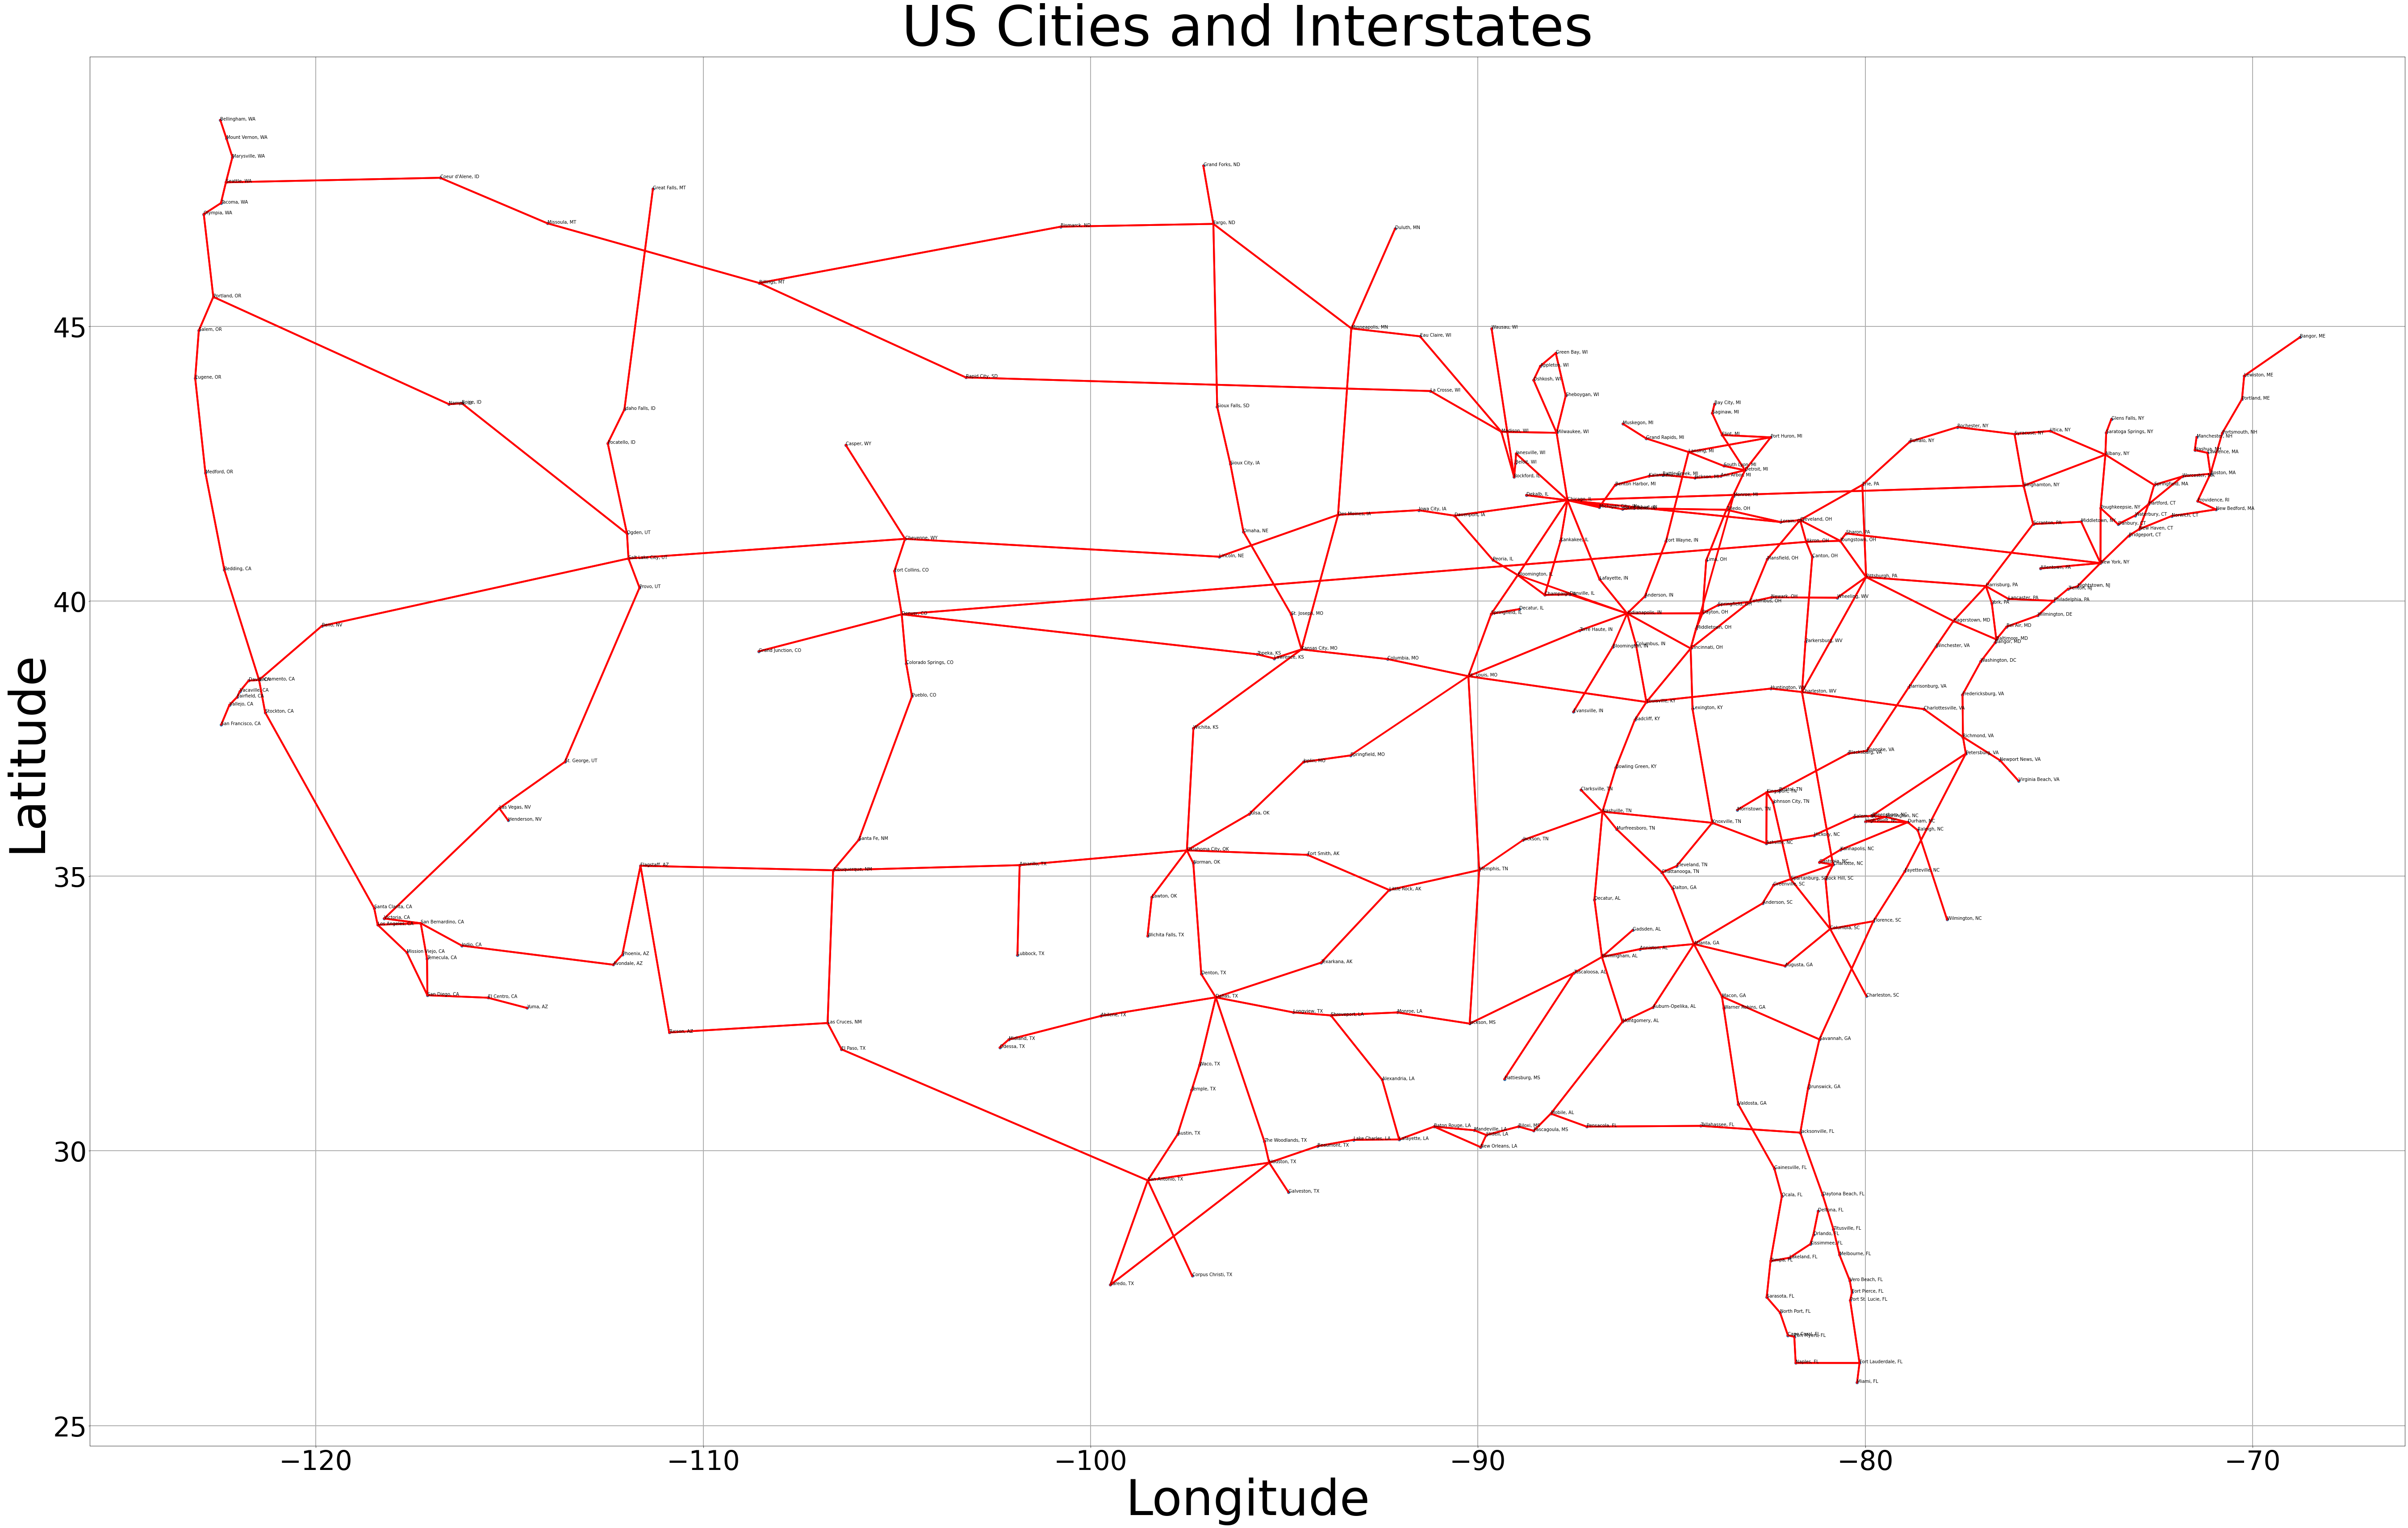

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd


def visual():
    # Load data
    file = './data.xlsx'
    data = pd.read_excel(file)

    # Store data
    city = list(data['city'])
    state = list(data['state'])
    lat = list(data['lat'])
    long = list(data['long'])

    # Visual
    plt.figure(figsize=(80, 48))
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.title('US Cities and Interstates', size=125)
    plt.ylabel('Latitude', size=110)
    plt.xlabel('Longitude', size=110)
    plt.tick_params(axis='y', labelsize=60)
    plt.tick_params(axis='x', labelsize=60)
    plt.grid(True, which='both', lw=2)

    # Plotting
    plt.scatter(long, lat)
    # fig, mapping = plt.subplots()
    # mapping.scatter(long, lat)
    for i, (c, st) in enumerate(zip(city, state)):
        txt = c + ', ' + st
        plt.annotate(txt, (long[i], lat[i]), size=10)

    # New data load
    citystate = [rtn for rtn in zip(city, state)]
    longlat = [rtn for rtn in zip(long, lat)]
    lookuptable = dict([rtn for rtn in zip(citystate, longlat)])
    citiescon = list(data['connected cities'])
    statecon = list(data['connected cities states'])
    for i, (long1, lat1) in enumerate(longlat):
        connected_cities = citiescon[i].split(', ')
        connected_states = statecon[i].split(', ')
        linesToDraw = zip(connected_cities, connected_states)
        for value in linesToDraw:
            longlat2 = lookuptable[value]
            long2 = longlat2[0]
            lat2 = longlat2[1]

            # draw line from long1 lat1 to long2 lat2
            plt.plot(list([long1, long2]), list([lat1, lat2]), lw=4, color='r')



    plt.show()


visual()